## Assignment 2 - Clustering

## Learning Outcomes

In this assignment, you will do the following:

* Explore a dataset and carry out clustering using k-means algorithm

* Identify the optimum number of clusters for a given dataset



## Problem Description

In this assignment, you will study the electricity demand from clients in Portugal, during 2013 and 2014. You have been provided with the data file, which you should download when you download this assignment file.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise, you will use clustering techniques to understand the typical usage behaviour during 2013-2014.

Both these datasets are publicly available, and can be used to carry out experiments. Their source is below:

 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm

We will start by exploring the data set and continue on to the assignment.  Consider this as a working notebook, you will add your work to the same notebook.

In this assignment we will use the sklearn package for k-means.  Please refer here for the documentation https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
(https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

The sklearn package for k-means is one of the many clustering algorithms found in the module "sklearn.cluster".  These come with a variety of functions that you can call by importing the package.

For example 
    
    from sklearn.cluster import AgglomerativeClustering
    from sklearn.cluster import KMeans



## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed. The data file has been provided with this assignment. It is also available at the links provided above.

In [1]:
# pathToFile = r"C:\\Users\\Kelsey\\02_Data_Garden\\course\\ML_Delina\\Assignment2"
pathToFile = r"./"
#pathToFile = r"C:\\Users\\<your username>\\Downloads\\"

fileName = 'LD2011_2014.txt'

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [3]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(pathToFile+fileName, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')

In [4]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", index_col=0)

### Quick data inspection

In [5]:
data.head(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [7]:
data.shape

(140256, 370)

#### As it can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


In [9]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the first 2 days of 2012 for the first 2 clients

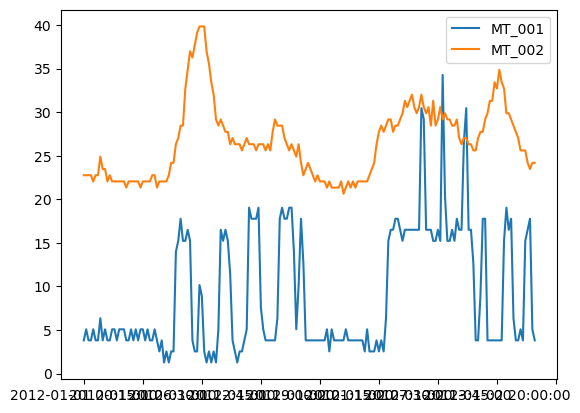

In [10]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We  note that the main difference between the curves is the level (also seen on the means in df.describe()).  We know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with low number of clients having zero demand

In [11]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [12]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [13]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [14]:
sum(data2013.mean()==0)

21

In [15]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = pd.concat([data2013, data2014]) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [16]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [17]:
data['hour'] = data.index.map(lambda x: x[11:])

In [18]:
data.head(3)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00


### Getting average curves per client
- summarize 2-years'days to 1 day with average usage per every 15 mins
- data structure: columns: clients,hour (shrink 730 days*96 rows to 96 rows)

In [19]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [20]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

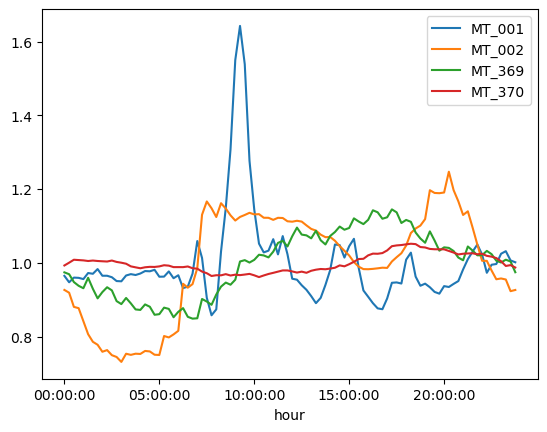

In [21]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

In [22]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']]

,MT_001,MT_002,MT_369,MT_370
hour,,,,
00:00:00,0.964792,0.926674,0.974307,0.992967
00:15:00,0.947378,0.919117,0.969266,1.000548
00:30:00,0.960104,0.880744,0.947969,1.008515
00:45:00,0.959434,0.877243,0.937889,1.007613
01:00:00,0.956085,0.841989,0.931284,1.006770
...,...,...,...,...
22:45:00,0.996941,0.955618,1.005845,1.013001
23:00:00,1.024736,0.957767,1.000981,1.004462
23:15:00,1.031768,0.954925,1.008670,0.991657


## Clustering Analysis on the average normalized curves

In [23]:
X = average_curves_norm.copy()  # We call this normalized curve
X = np.array(X.T) # put it on the right format:X.T - Transpose the DataFrame;np.array() - Convert to NumPy Array

In [24]:
a=average_curves_norm.copy() 
a.T

hour,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,02:15:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
MT_001,0.964792,0.947378,0.960104,0.959434,0.956085,0.972494,0.970485,0.983211,0.965127,0.965127,...,1.030429,1.049852,1.022727,0.973164,0.994931,0.996941,1.024736,1.031768,1.006652,1.001629
MT_002,0.926674,0.919117,0.880744,0.877243,0.841989,0.806701,0.786076,0.778034,0.759108,0.763579,...,1.095834,1.049731,1.005708,1.005500,0.979363,0.955618,0.957767,0.954925,0.923346,0.926570
MT_003,0.991800,0.977796,0.976579,0.971708,0.953443,0.949181,0.954660,0.947354,0.918739,0.925436,...,1.111741,1.101391,1.092867,1.081908,1.069122,1.038072,1.009456,1.003976,0.998497,0.993017
MT_004,1.140106,1.099159,1.061641,1.030153,0.975761,0.920906,0.897345,0.875850,0.855450,0.836217,...,1.502958,1.495640,1.462960,1.422622,1.389845,1.347294,1.293558,1.238946,1.209744,1.175290
MT_005,1.186498,1.131703,1.090238,1.053960,1.024347,0.992994,0.962757,0.934785,0.918994,0.903958,...,1.366081,1.376127,1.382463,1.388340,1.385878,1.369364,1.352292,1.324550,1.272842,1.231541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT_366,1.358632,1.365299,1.312627,1.245171,1.292298,1.246425,1.221937,1.160817,1.096199,0.922938,...,1.361140,1.352362,1.356124,1.300020,1.358302,1.417178,1.406155,1.393548,1.360414,1.324442
MT_367,1.215272,1.184899,1.177781,1.156699,1.149629,1.139513,1.125489,1.092430,1.069030,1.043176,...,1.002055,1.014598,1.021865,1.182977,1.273484,1.265394,1.268087,1.252350,1.247264,1.227273
MT_368,1.170441,1.223818,1.211343,1.189829,1.167326,1.105127,0.993529,0.914299,0.842847,0.789775,...,1.298331,1.280347,1.264828,1.242055,1.223890,1.204952,1.186229,1.174311,1.153788,1.136380
MT_369,0.974307,0.969266,0.947969,0.937889,0.931284,0.959546,0.929746,0.903852,0.920795,0.933955,...,1.033427,1.020555,1.020748,1.032500,1.023658,1.005845,1.000981,1.008670,1.003680,0.974611


# Questions (15 marks total)

**Q1: (7 marks)**

a. Determine what a convenient number of clusters. Justify your choice.  Make use of the sklearn's package for k-means for this. You may refer to the module to figure out how to come up with the optimal number of clusters. 

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the center of the cluster (make this curve thicker to distinguish it from the individual curves).  The center is also sometimes referred to as "centroid".
    
You have 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

In [25]:
import os
os.environ["OMP_NUM_THREADS"] = "1" 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [26]:
inertia_values = []
k_range = range(1, 12)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

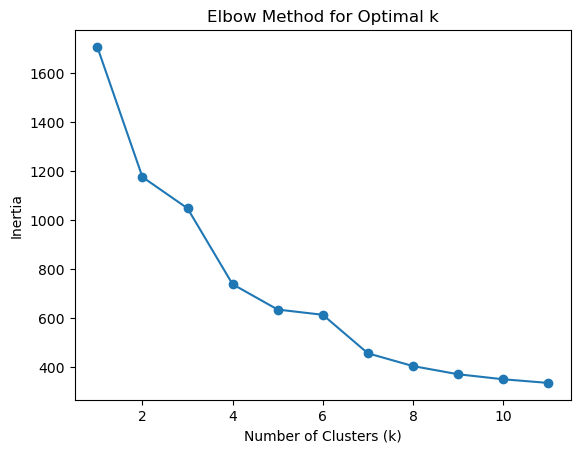

In [27]:
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

- Note: The bump in above graph (k=6 and k=7) is a sign of an unstable training process, not a true property of X data. If i train with other random number, sometimes this bump disappears. 
- Insight: The optimal k is 3, as the major drop happens before that point.

In [28]:
# 2. PERFORM K-MEANS CLUSTERING (k=3)
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init='auto')
kmeans.fit(X)

# Extract classification results
labels = kmeans.labels_
centers = kmeans.cluster_centers_

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [29]:
X

array([[0.96479215, 0.94737834, 0.96010381, ..., 1.03176835, 1.00665227,
        1.00162906],
       [0.92667365, 0.91911689, 0.8807438 , ..., 0.95492484, 0.9233459 ,
        0.92656966],
       [0.99179969, 0.97779638, 0.9765787 , ..., 1.00397648, 0.99849693,
        0.99301737],
       ...,
       [1.17044059, 1.22381837, 1.21134255, ..., 1.17431116, 1.15378816,
        1.13637963],
       [0.97430716, 0.96926554, 0.94796904, ..., 1.00867049, 1.00368029,
        0.97461078],
       [0.99296729, 1.00054813, 1.00851498, ..., 0.99165659, 0.99394714,
        0.98743097]])

In [30]:
hours = np.arange(X.shape[1])
hours

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

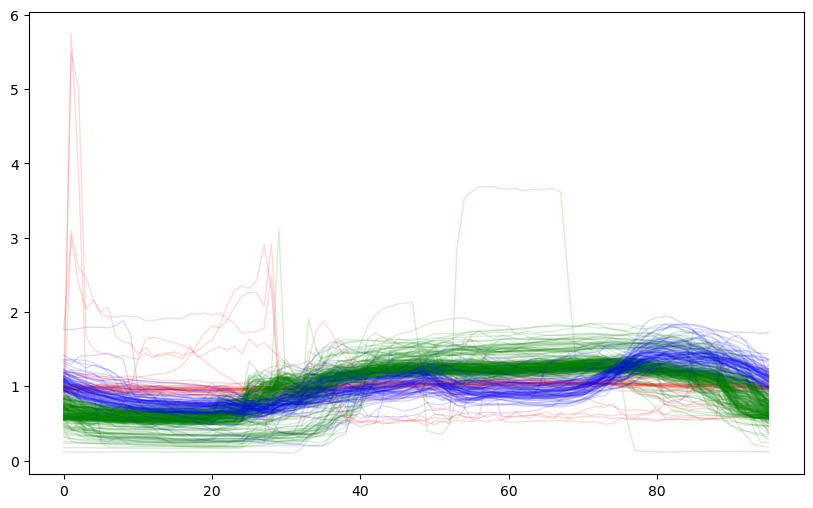

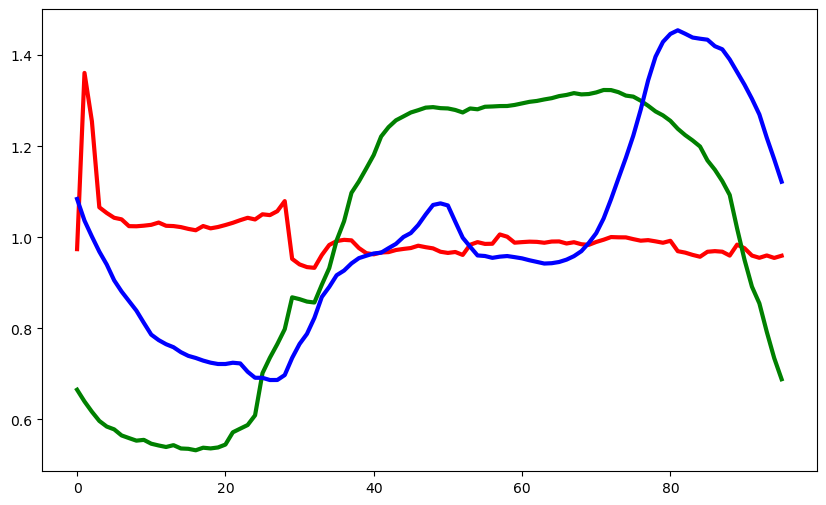

In [31]:
import matplotlib.pyplot as plt
import numpy as np # (Ensure numpy is imported for arange, if not already)

# Define colors for the three clusters
colors = ['r', 'g', 'b']

# --- FIGURE 1: INDIVIDUAL CLUSTER PROFILES AND CENTERS
fig1, ax1 = plt.subplots(figsize=(10, 6))

# --- FIGURE 2: CLUSTER CENTERS ONLY 
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Loop through each cluster (k=0, 1, 2)
for k in range(K):
    # Select all observations belonging to cluster k
    cluster_profiles = X[labels == k]
    center_curve = centers[k]

    # 1. Plot individual profiles on AX1
    for profile in cluster_profiles:
        ax1.plot(hours, profile, color=colors[k], alpha=0.15, linewidth=1)

    # 2. Plot the cluster center on AX2 
    ax2.plot(hours, center_curve, color=colors[k], linewidth=3, linestyle='-')


# Display both figures
# plt.tight_layout()
plt.show()

In [32]:
client = 'MT_022'
oneClient = data_13_14[client]
X_day = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X_day.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

In [33]:
client_ids = average_curves_norm.copy().T.index

In [34]:
# Create a mapping DataFrame
results_df = pd.DataFrame({
    'client_id': client_ids,
    'cluster_label': labels
})

In [35]:
results_df[results_df['client_id']=='MT_022']
# MT_022 is clustered in cluster 1

,client_id,cluster_label
21,MT_022,1


In [36]:
# find example belongs to other cluster
results_df[results_df['cluster_label']==2].head()

,client_id,cluster_label
3,MT_004,2
4,MT_005,2
5,MT_006,2
6,MT_007,2
7,MT_008,2


In [37]:
results_df[results_df['cluster_label']==0].head()

,client_id,cluster_label
0,MT_001,0
1,MT_002,0
2,MT_003,0
28,MT_029,0
31,MT_032,0


#difference between extend and append
X = []
day1 = np.array([10, 20, 30])
day2 = np.array([40, 50, 60])

# extend with multiple elements
X.extend([day1, day2])  # Unpacks both arrays
print(len(X))  # 2
print(X)  # [array([10,20,30]), array([40,50,60])]

# Compare with append
Y = []
Y.append([day1, day2])  # Adds the entire list as one element
print(len(Y))  # 1
print(Y)  # [[array([10,20,30]), array([40,50,60])]]

**Q2: (8 marks)**

In this exercise you work with the daily curves of 1 single client.
First, create a list of arrays, each array containing a curve for a day. You may use X from the cells above.
    X = average_curves_norm.copy() 
The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value of k ( number of clusters). This time you may also perform silhoutte analysis as stated in the module. Carrying out silhoutte analysis is left as an exercise. What do you understand about the clusters? 

Learning about the clusters:

    1. For client MT_022 (Client-Cluster-1), the optimal number of clusters is 2.
    
    2. The two clusters demonstrate clear separation and distinction, as evidenced by a silhouette score of 0.5011 for k=2, compared to significantly poorer scores for higher k values.
    
    3. For comparison, I analyzed MT_001 from Client-Cluster-0. While its elbow plot showed a clear elbow at k=2, the silhouette scores for k=2 through 5 showed minimal variation, suggesting the data lacks naturally distinct groupings.

b. Based on your results from your analyses of both methods, what do understand?  Interpret it perhaps with different perspectives of timelines like weeks or months.

    1. for MT_022 (Client-Cluster-1), days in Cluster 0 (red line) show significantly higher electricity usage compared to Cluster 1 (green line) days.
    
    2. After mapping clusters to weekdays, I found that 74% of Cluster 1 (green line) days fall on weekends (Saturday or Sunday). This reveals that weekend days (Cluster 1, green line) exhibit substantially lower electricity usage than weekdays (Cluster 0, red line) for client MT_022.

Continue with your analysis here:

* MT_022 in cluster 1

In [38]:
X_day_array = np.array(X_day)
inertia_values_day = []
k_range = range(1, 12)

for k in k_range:
    kmeans_day = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_day.fit(X_day_array)
    inertia_values_day.append(kmeans_day.inertia_)

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

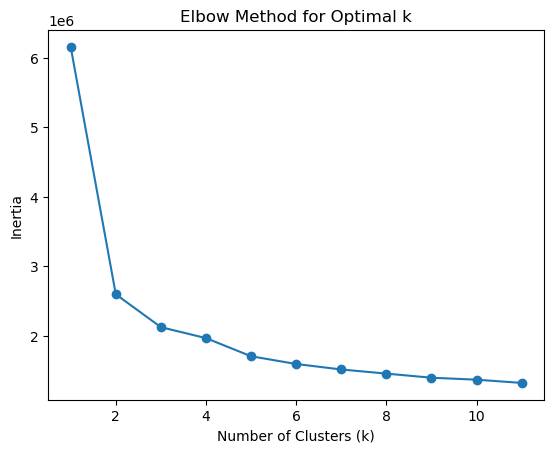

In [39]:
plt.plot(k_range, inertia_values_day, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [40]:
silhouette_scores=[]
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_day_array)
    
    silhouette_avg = silhouette_score(X_day_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")
    

k=2: Silhouette Score = 0.5011
k=3: Silhouette Score = 0.2822
k=4: Silhouette Score = 0.2135
k=5: Silhouette Score = 0.2184
k=6: Silhouette Score = 0.2004


C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

- appropriate number of clusters is 2

In [41]:
K = 2
kmeans_day_2 = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_day_2.fit(X_day_array)

# Extract classification results
labels_day = kmeans_day_2.labels_
centers_day = kmeans_day_2.cluster_centers_

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


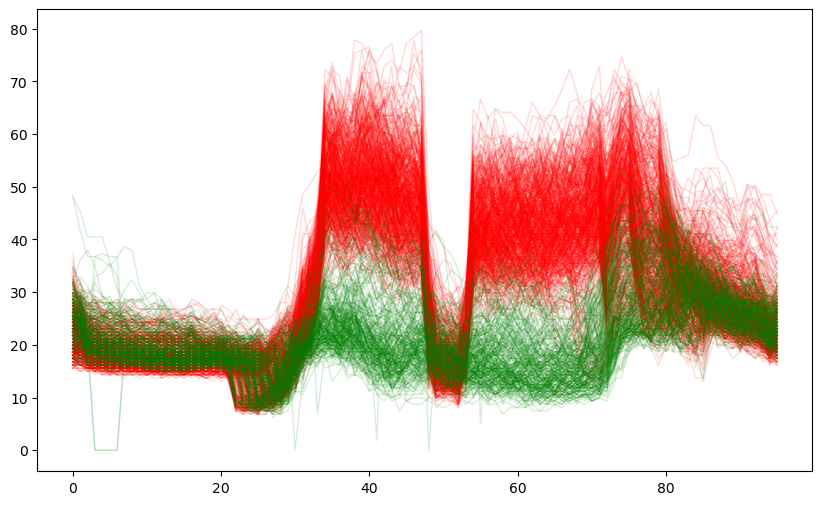

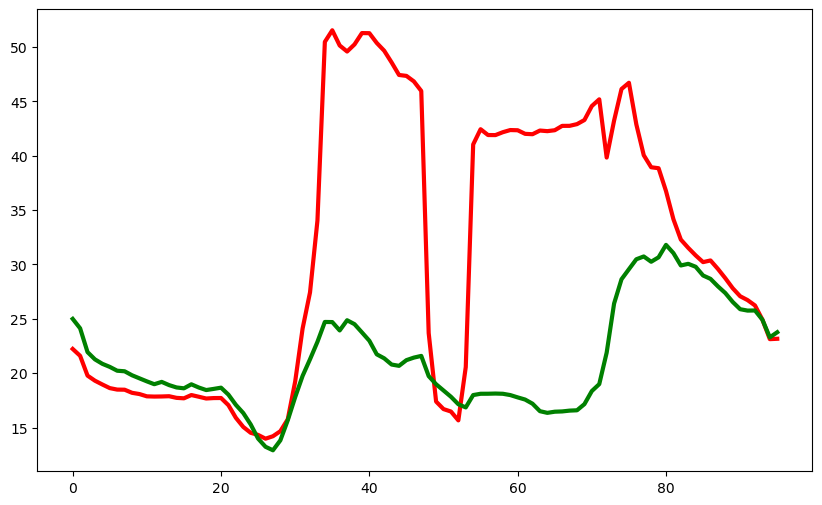

In [42]:
# Define colors for the three clusters
colors = ['r', 'g']

# --- FIGURE 1: INDIVIDUAL CLUSTER PROFILES AND CENTERS
fig1, ax1 = plt.subplots(figsize=(10, 6))

# --- FIGURE 2: CLUSTER CENTERS ONLY 
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Loop through each cluster (k=0, 1)
for k in range(K):
    # Select all observations belonging to cluster k
    cluster_profiles = X_day_array[labels_day == k]
    center_curve = centers_day[k]

    # 1. Plot individual profiles on AX1
    for profile in cluster_profiles:
        ax1.plot(hours, profile, color=colors[k], alpha=0.15, linewidth=1)

    # 2. Plot the cluster center on AX2 
    ax2.plot(hours, center_curve, color=colors[k], linewidth=3, linestyle='-')


# Display both figures
# plt.tight_layout()
plt.show()

- Note: cluster 0 (red line) use much more electricity than cluster 1 (green line)
- Inights: cluster 0 and 1 show different dates group by weekday and weekend. I need to map with week-day to see which cluster is weekend.

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b).  The cells below are only to give you a headstart.  You may or may not use these and come up with your own interpretation.


In [43]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

In [44]:
len(daysyear)

730

#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for pard (b)

In [45]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]

In [46]:
from itertools import compress
dates_list_1=list(compress(daysyear, labels_day))

In [47]:
count_sat_sun = len([item for item in dates_list_1 if item.startswith(('sat', 'sun'))])
count_sat_sun/len(dates_list_1)

0.7397260273972602

- note: 74% of cluster 1 (green line) is on weekend (Saturday or Sunday)
- Insight: The usage in cluster 1 weekend(green line) are much lower than cluster 0 week days (red line) for client 'MT_022' .

* MT_001 in cluster 0

In [48]:
client = 'MT_001'
oneClient = data_13_14[client]
X_day = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X_day.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

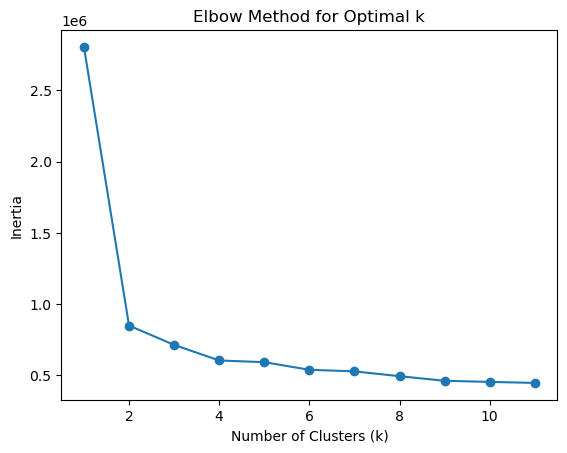

In [49]:
X_day_array = np.array(X_day)
inertia_values_day = []
k_range = range(1, 12)

for k in k_range:
    kmeans_day = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_day.fit(X_day_array)
    inertia_values_day.append(kmeans_day.inertia_)

plt.plot(k_range, inertia_values_day, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [50]:
silhouette_scores=[]
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(X_day_array)
    
    silhouette_avg = silhouette_score(X_day_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: Silhouette Score = {silhouette_avg:.4f}")

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


k=2: Silhouette Score = 0.6952
k=3: Silhouette Score = 0.6238
k=4: Silhouette Score = 0.6374
k=5: Silhouette Score = 0.5706
k=6: Silhouette Score = 0.4162


C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


- good k is 2

In [51]:
K = 4
kmeans_day_3 = KMeans(n_clusters=K, random_state=42, n_init='auto')
kmeans_day_3.fit(X_day_array)

# Extract classification results
labels_day = kmeans_day_3.labels_
centers_day = kmeans_day_3.cluster_centers_

C:\Users\Kelsey\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


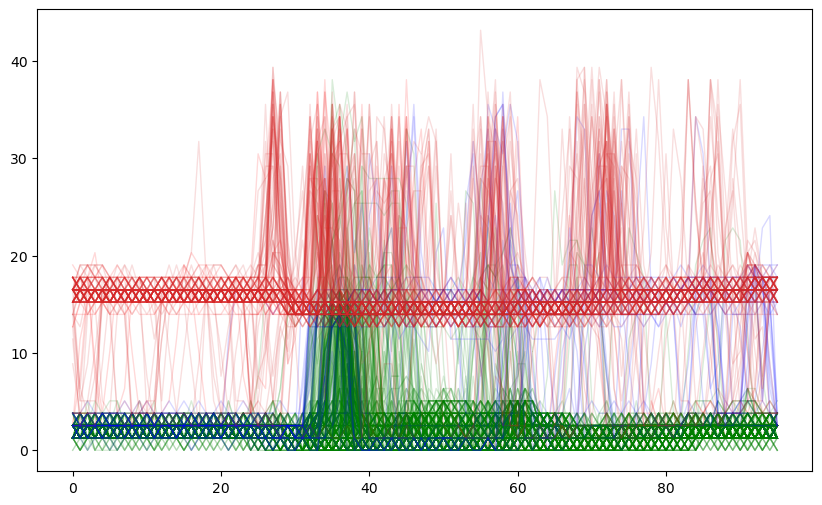

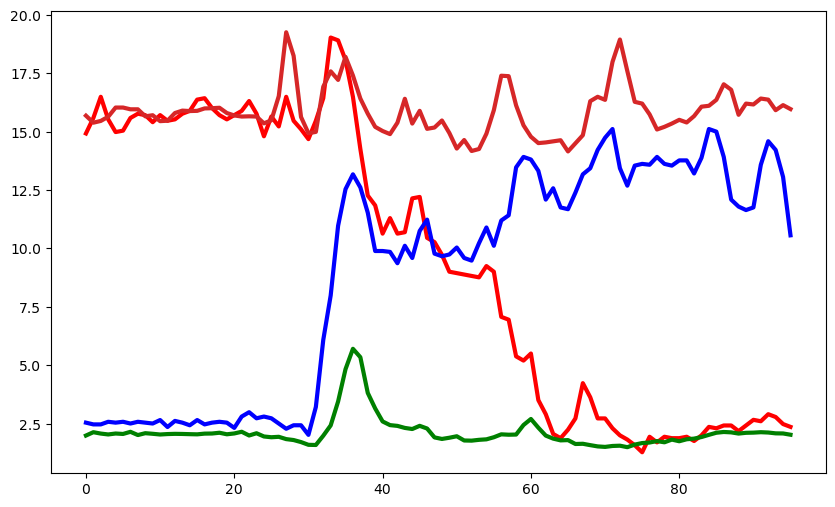

In [52]:
# Define colors for the three clusters
colors = ['r', 'g', 'b', 
          '#d62728', '#9467bd', '#8c564b']  # blue, orange, green, red, purple, brown

# --- FIGURE 1: INDIVIDUAL CLUSTER PROFILES AND CENTERS
fig1, ax1 = plt.subplots(figsize=(10, 6))

# --- FIGURE 2: CLUSTER CENTERS ONLY 
fig2, ax2 = plt.subplots(figsize=(10, 6))

# Loop through each cluster (k=0, 1)
for k in range(K):
    # Select all observations belonging to cluster k
    cluster_profiles = X_day_array[labels_day == k]
    center_curve = centers_day[k]

    # 1. Plot individual profiles on AX1
    for profile in cluster_profiles:
        ax1.plot(hours, profile, color=colors[k], alpha=0.15, linewidth=1)

    # 2. Plot the cluster center on AX2 
    ax2.plot(hours, center_curve, color=colors[k], linewidth=3, linestyle='-')


# Display both figures
# plt.tight_layout()
plt.show()

- A positive silhouette score (> 0) indicates that there are distinct sub-groups in the data.

- Therefore, instead of using K = 2 as suggested by the elbow method, I will use K = 4 to better capture the cluster structure.

In [53]:
from itertools import compress

# Create a dictionary to store date lists by cluster label
dates_by_group = {}

for k in range(K):  # since you have 3 clusters: 0, 1, 2
    mask = (labels_day == k)            # Boolean mask for this cluster
    dates_list_k = list(compress(daysyear, mask))  # Select dates for cluster k
    dates_by_group[k] = dates_list_k

# Now you can access:
dates_by_group[0]  # dates belonging to cluster 0
dates_by_group[1]  # dates belonging to cluster 1
dates_by_group[2]  # dates belonging to cluster 2

# Optional: print summary
for k, dates in dates_by_group.items():
    print(f"Cluster {k}: {len(dates)} dates")

Cluster 0: 21 dates
Cluster 1: 540 dates
Cluster 2: 34 dates
Cluster 3: 135 dates


In [54]:
dates_by_group[0][0:20]

['wed-2013-02-06',
 'fri-2013-05-24',
 'fri-2013-05-31',
 'wed-2013-06-12',
 'thu-2013-06-20',
 'mon-2013-08-26',
 'fri-2013-10-18',
 'wed-2013-10-23',
 'mon-2013-12-02',
 'tue-2014-03-25',
 'wed-2014-04-23',
 'fri-2014-05-09',
 'fri-2014-05-16',
 'tue-2014-05-20',
 'tue-2014-06-03',
 'fri-2014-06-06',
 'wed-2014-06-18',
 'fri-2014-07-11',
 'wed-2014-07-30',
 'mon-2014-08-04']

In [55]:
dates_list_1[0:10]

['tue-2013-01-01',
 'sat-2013-01-05',
 'sun-2013-01-06',
 'sat-2013-01-12',
 'sun-2013-01-13',
 'sat-2013-01-19',
 'sun-2013-01-20',
 'sat-2013-01-26',
 'sun-2013-01-27',
 'sat-2013-02-02']